In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib
from matplotlib.colors import BoundaryNorm, ListedColormap

In [2]:
C_opt = 0.15
C_r = 0.4
M = 0.002 

In [3]:
a_52 = ( ( C_opt )**2 / ( C_r - 2*C_opt ) )
sigma_5c = M / ( C_r - 2*C_opt )
rho_5c = M * ( (C_r - C_opt) / (C_r - 2*C_opt) )**2

In [4]:
def phi_51(D,a_51,c,D_opt5):
    
    return ( ( c**( (1) / (1+c) ) )*( np.exp( a_51*D_opt5 ) ) + ( c**( - (c) / (1+c) ) )*( np.exp( -c*a_51*D_opt5 ) ) ) \
        / ( ( c**( (1) / (1+c) ) )*( np.exp( -a_51*(D-D_opt5) ) ) + ( c**( - (c) / (1+c) ) )*( np.exp( c*a_51*(D-D_opt5) ) ) )

def x_5e(D,C,s,d,a_51,c,D_opt5,rho_5c,a_52,sigma_5c):
    
    return ( s * phi_51(D,a_51,c,D_opt5) ) / ( d - rho_5c * ( (C) / (a_52 + C) ) + sigma_5c * C )

Text(0.05, 1.03, '$(c)$')

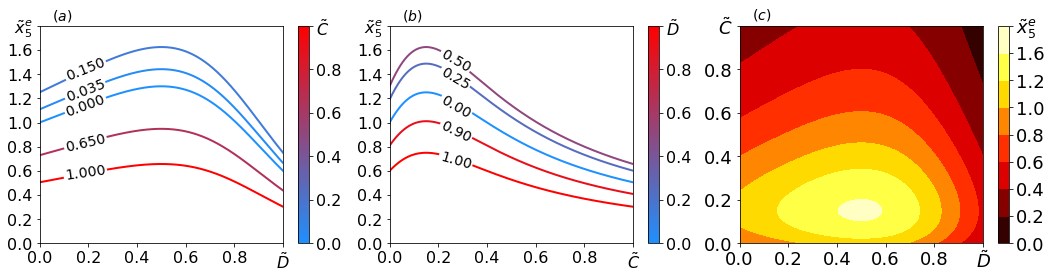

In [5]:
fig, axs= plt.subplots(1,3,figsize=(18,4))

Ds=np.linspace(0,1,1000)

s = d = 1/100
a_51 = 0.8206
c = 5.83
D_opt5 = 0.5

colors = [(0, 'dodgerblue'), (1, 'red')]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_map", colors)
cmap = custom_cmap
norm = matplotlib.colors.Normalize(0,1)

Cs = [0.0,0.035,0.15,0.65,1.0]

for C in Cs:
    
    axs[0].plot(Ds,x_5e(Ds,C,s,d,a_51,c,D_opt5,rho_5c,a_52,sigma_5c),linewidth=2,color=cmap(C))

cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs[0])
cbar.set_ticks([0.0,0.2,0.4,0.6,0.8,1.0])
cbar.set_ticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{C}$'])
cbar.ax.tick_params(labelsize=16) 
    
axs[0].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8])
axs[0].set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0','1.2','1.4','1.6',r'$\tilde{x}_5^e$'])
    
axs[0].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
axs[0].set_xticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{D}$'])
    
axs[0].tick_params(axis='both',labelsize=16)
    
axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1.8)

axs[0].text(0.1,1.345,r'$0.150$',rotation=22,fontsize=14,backgroundcolor='white',\
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))
axs[0].text(0.1,1.17,r'$0.035$',rotation=21,fontsize=14,backgroundcolor='white',\
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))
axs[0].text(0.1,1.05,r'$0.000$',rotation=20,fontsize=14,backgroundcolor='white',\
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))
axs[0].text(0.1,0.76,r'$0.650$',rotation=13,fontsize=14,backgroundcolor='white',\
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))
axs[0].text(0.1,0.53,r'$1.000$',rotation=8,fontsize=14,backgroundcolor='white',\
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))





def x_5e(C,D,s,d,a_51,c,D_opt5,rho_5c,a_52,sigma_5c):
    
    return ( s * phi_51(D,a_51,c,D_opt5) ) / ( d - rho_5c * ( (C) / (a_52 + C) ) + sigma_5c * C )

Ds = [0.0,0.25,0.5,0.9,1.0]

Cs=np.linspace(0,1,1000)

for D in Ds:
    
    axs[1].plot(Cs,x_5e(Cs,D,s,d,a_51,c,D_opt5,rho_5c,a_52,sigma_5c),linewidth=2,color=cmap(D))

cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs[1])
cbar.set_ticks([0.0,0.2,0.4,0.6,0.8,1.0])
cbar.set_ticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{D}$'])
cbar.ax.tick_params(labelsize=16) 
    
axs[1].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8])
axs[1].set_yticklabels(['0.0','0.2','0.4','0.6','0.8','1.0','1.2','1.4','1.6',r'$\tilde{x}_5^e$'])

axs[1].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
axs[1].set_xticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{C}$'])
    
axs[1].tick_params(axis='both',labelsize=16)
    
axs[1].set_xlim(0,1)
axs[1].set_ylim(0,1.8)

axs[1].text(0.2,1.42,r'$0.50$',rotation=-30,fontsize=14,backgroundcolor='white',\
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))
axs[1].text(0.2,1.28,r'$0.25$',rotation=-30,fontsize=14,backgroundcolor='white',\
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))
axs[1].text(0.2,1.04,r'$0.00$',rotation=-30,fontsize=14,backgroundcolor='white',\
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))
axs[1].text(0.2,0.84,r'$0.90$',rotation=-26,fontsize=14,backgroundcolor='white',\
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))
axs[1].text(0.2,0.62,r'$1.00$',rotation=-16,fontsize=14,backgroundcolor='white',\
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'))





def x_5e(D,C,s,d,a_51,c,D_opt5,rho_5c,a_52,sigma_5c):
    
    return ( s * phi_51(D,a_51,c,D_opt5) ) / ( d - rho_5c * ( (C) / (a_52 + C) ) + sigma_5c * C )

Css=np.linspace(0,1,1000)
Dss=np.linspace(0,1,1000)

Ds, Cs = np.meshgrid(Dss,Css)

Z = x_5e(Ds,Cs,s,d,a_51,c,D_opt5,rho_5c,a_52,sigma_5c)

custom_cmap ='hot'
norm = matplotlib.colors.Normalize(np.min(Z),np.max(Z))

im = axs[2].contourf(Ds,Cs,Z,cmap=custom_cmap)

cbar = plt.colorbar(im,ax=axs[2])

cbar.set_ticks([0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8])
cbar.set_ticklabels(['0.0','0.2','0.4','0.6','0.8','1.0','1.2','1.6',r'$\tilde{x}_5^e$'])
cbar.ax.tick_params(labelsize=18) 

axs[2].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
axs[2].set_xticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{D}$'])

axs[2].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
axs[2].set_yticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{C}$'])

axs[2].tick_params(axis='both',labelsize=18)

fig.subplots_adjust(wspace=0.15)


axs[0].text(0.05,1.85,r'$(a)$',fontsize=14)
axs[1].text(0.05,1.85,r'$(b)$',fontsize=14)
axs[2].text(0.05,1.03,r'$(c)$',fontsize=14)